# Assignment pre-series04 - Python
## By Chloé Laignel et Amélie Goubé

## 1.  Generate a known signal

1. write down the equation of a sinusoid at 1Hz.
2. create a 1D time vector with 1000 samples and a sampling frequency of 100 Hz.
3. using time, create a signal that is a 2D numpy array with the dimensions (x, y, z) over columns : use a sinusoid at 1Hz, with Pi/4 shift from x to y and to z.
4. reproduce the output below (i.e., the text and the 2D and 3D plots)

In [3]:
conda install -c plotly plotly


2 channel Terms of Service accepted
Retrieving notices: done
Channels:
 - plotly
 - defaults
Platform: osx-64
Solving environment: done

## Package Plan ##

  environment location: /opt/miniconda3

  added / updated specs:
    - plotly


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    narwhals-1.31.0            |  py313hecd8cb5_1         580 KB
    plotly-6.0.0               |             py_0         5.4 MB  plotly
    ------------------------------------------------------------
                                           Total:         5.9 MB

The following NEW packages will be INSTALLED:

  narwhals           pkgs/main/osx-64::narwhals-1.31.0-py313hecd8cb5_1 
  plotly             plotly/noarch::plotly-6.0.0-py_0 



plotly-6.0.0         | 5.4 MB    |                                       |   0% 
narwhals-1.31.0      | 580 KB    |                                       |   0% 
narwhals-1

t.shape = (100, 1)
S.shape = (100, 3)
phase_shift = 0.7853981633974483


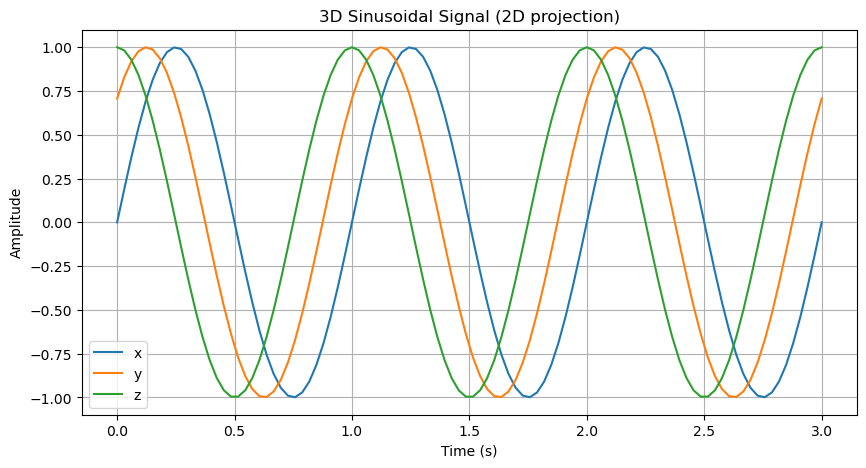

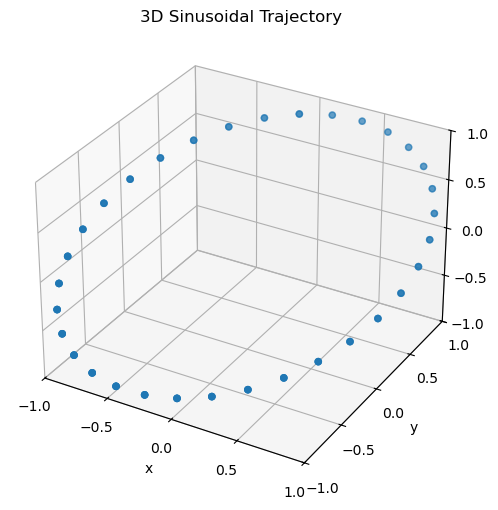

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# -----------------------------------------
# Question 1 – Generate a known signal
# -----------------------------------------

# Sampling parameters
fs = 100              # sampling frequency (Hz)
f0 = 1.0              # signal frequency (Hz)
A = 1.0               # amplitude

# Phase shift between axes
phase_shift = 0.25 * np.pi   # 0.25π rad = 45 degrees

# Create a time vector from 0 to 3 seconds with exactly 100 samples
t = np.linspace(0, 3, 100).reshape(-1, 1)

# Build a 3D signal:
# x(t): phase = 0
# y(t): phase shifted by +phase_shift
# z(t): phase shifted by +2*phase_shift
s_x = A * np.sin(2 * np.pi * f0 * t + 0)
s_y = A * np.sin(2 * np.pi * f0 * t + phase_shift)
s_z = A * np.sin(2 * np.pi * f0 * t + 2 * phase_shift)

# Stack the components into one array (N, 3)
S = np.hstack([s_x, s_y, s_z])

# Print shapes (as requested in the assignment)
print("t.shape =", t.shape)
print("S.shape =", S.shape)
print("phase_shift =", phase_shift)

# -----------------------------------------
# 2D Plot (x, y, z over time)
# -----------------------------------------
plt.figure(figsize=(10, 5))
plt.plot(t, S[:,0], label='x')
plt.plot(t, S[:,1], label='y')
plt.plot(t, S[:,2], label='z')
plt.title("3D Sinusoidal Signal (2D projection)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()

# -----------------------------------------
# 3D Plot (x, y, z trajectory)
# -----------------------------------------
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(S[:,0], S[:,1], S[:,2])
ax.set_title("3D Sinusoidal Trajectory")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

# limits of the axes
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

ax.set_xticks(np.arange(-1, 1.5, 0.5))
ax.set_yticks(np.arange(-1, 1.5, 0.5))
ax.set_zticks(np.arange(-1, 1.5, 0.5))

plt.show()



## 2. Estimate the derivative of the signal

1. write down the math to get the derivative of a sine wave.

Given a sine function:
$$
s(t) = A \sin(2 \pi f t + \phi)
$$

Its analytical derivative is:

$$
\frac{ds}{dt} = 2 \pi f A \cos(2 \pi f t + \phi)
$$

2. write down the equation of the derivative of signal along each axis.

For a 3D signal:

$$
\mathbf{S}(t) =
\begin{bmatrix}
x(t) \\
y(t) \\
z(t)
\end{bmatrix}
$$

Each component is a sinusoid with a phase shift:

$$
\dot{x}(t) = 2 \pi f A \cos(2 \pi f t + \phi_x)
$$

$$
\dot{y}(t) = 2 \pi f A \cos(2 \pi f t + \phi_y)
$$

$$
\dot{z}(t) = 2 \pi f A \cos(2 \pi f t + \phi_z)
$$

3. create a function that estimates the time derivative of a signal:

We can estimate the derivative numerically using two methods:

**1. Forward difference:**

$$
\dot{s}(t_i) \approx \frac{s(t_{i+1}) - s(t_i)}{t_{i+1} - t_i}
$$

**2. Central difference:**

$$
\dot{s}(t_i) \approx \frac{s(t_{i+1}) - s(t_{i-1})}{t_{i+1} - t_{i-1}}
$$

> Note: At the boundaries, forward/backward difference is used to keep the same array length.

In [5]:
# ---------------------------------------------------------
# Derivative estimation functions (Forward and Central)
# ---------------------------------------------------------

def derivative_forward(signal, time):
    """
    Estimate the derivative using the forward difference method.
    Maintains the same length as the input signal by using
    a backward difference for the last sample.
    """
    s = np.asarray(signal)
    t = np.asarray(time).reshape(-1)
    
    if s.ndim == 1:
        s = s.reshape(-1, 1)  # convert to 2D
    
    N, D = s.shape
    ds = np.zeros((N, D))
    
    # Forward difference for all points except the last
    dt = np.diff(t)
    ds[:-1, :] = (s[1:, :] - s[:-1, :]) / dt[:, None]
    
    # Backward difference at the final point
    ds[-1, :] = (s[-1, :] - s[-2, :]) / (t[-1] - t[-2])
    
    return ds


def derivative_central(signal, time):
    """
    Estimate the derivative using the central difference method.
    Uses forward/backward difference at the boundaries.
    """
    s = np.asarray(signal)
    t = np.asarray(time).reshape(-1)
    
    if s.ndim == 1:
        s = s.reshape(-1, 1)
    
    N, D = s.shape
    ds = np.zeros((N, D))
    
    # Central difference for interior points
    for i in range(1, N - 1):
        dt = t[i + 1] - t[i - 1]
        ds[i, :] = (s[i + 1, :] - s[i - 1, :]) / dt
    
    # Forward and backward differences at the boundaries
    ds[0, :] = (s[1, :] - s[0, :]) / (t[1] - t[0])
    ds[-1, :] = (s[-1, :] - s[-2, :]) / (t[-1] - t[-2])
    
    return ds


4. apply the function to the signal and plot the result.

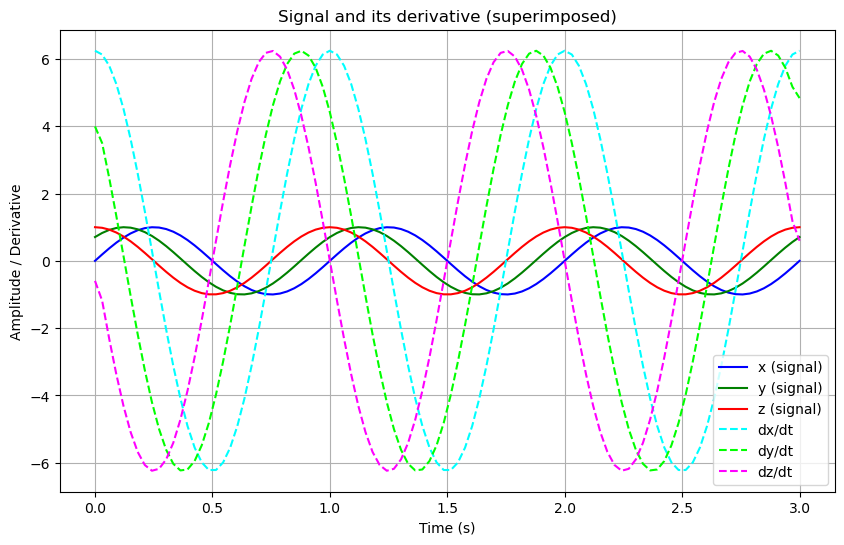

In [7]:
# Compute derivatives if not already done
dS_central = derivative_central(S, t)  # central difference

# Plot original signal + derivative on the same figure
plt.figure(figsize=(10,6))

# Plot original signal (x, y, z)
plt.plot(t, S[:,0], label='x (signal)', color='blue')
plt.plot(t, S[:,1], label='y (signal)', color='green')
plt.plot(t, S[:,2], label='z (signal)', color='red')

# Plot derivative of the signal (x, y, z)
plt.plot(t, dS_central[:,0], '--', label='dx/dt', color='cyan')
plt.plot(t, dS_central[:,1], '--', label='dy/dt', color='lime')
plt.plot(t, dS_central[:,2], '--', label='dz/dt', color='magenta')

# Labels and title
plt.xlabel("Time (s)")
plt.ylabel("Amplitude / Derivative")
plt.title("Signal and its derivative (superimposed)")
plt.legend()
plt.grid()
plt.show()
